# This script demonstrates Building a binary classifier

# Name : Eun-Yeong Jeon

# Student ID : 20153334

## github : https://github.com/Eun0/Assignment

# Import packages for plotting graphs and manipulating data :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define normalize(data) function :

Normalize the values of the input data to be [0,1]

In [2]:
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# Define distance(x,y) function :

Compute distance between two vectors x and y

In [3]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# Load train and test data :

In [4]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Make a matrix each column of which represents an images in a vector form :

In [5]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Plot first 150 images out of 10,000 with their labels :

(784, 60000)


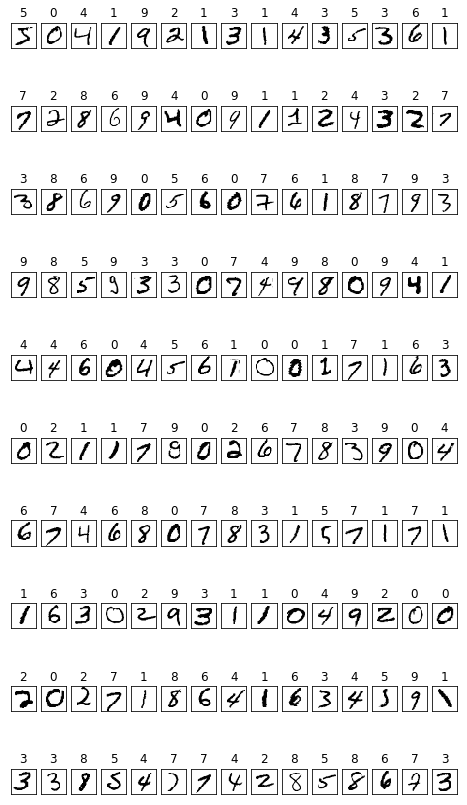

In [6]:
f1 = plt.figure(1,figsize=(8,15))

for i in range(150):

    label       = list_label_train[i]
    im_vector   = list_image_train[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    
print(list_image_train.shape)
plt.show()

# Plot the average image of all the images for each digit(label) :

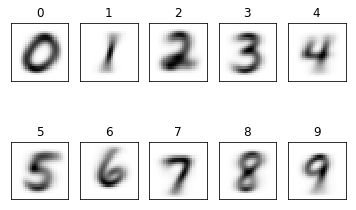

In [7]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_train):

    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Define make_blabel(list_label) function :

- Parameter : list_label (numpy.ndarray)

  list_label : original label of data
  

- Return : blabel (numpy.ndarray)

  blabel : vectors which is obtained by applying our rule to list_label



Make vector which contains binary label(1 or -1) according to the list_label

we set label as below

label = $ \begin{cases}
 +1 & , x=0 \\ 
-1 & , otherwise 
\end{cases}$

In [8]:
def make_blabel(list_label):
    
    blabel=np.ones_like(list_label)
    
    blabel[list_label>0]=-1
    
    return blabel

#  Make blabel each vector according to the train and test data :

In [9]:
blabel_train=make_blabel(list_label_train)
blabel_test=make_blabel(list_label_test)

# How construct a model :

we use a model $\tilde{f}(x;\theta)=\theta_{1}f_1(x)+\theta_2f_2(x)+...+\theta_pf_p(x)$ 

Let $f_i$ be a feature function

s.t. $f_i(x)=r_i^Tx$ where $r_i \sim N(0,\sigma)$ 

Find an optimal set of ($\theta_1,...,\theta_p$) by least square approximate solution

Return the optimal set of $\theta's$ and the model

********** How to find $\theta's$ **********

In matrix form,

$x_j$ = j-th data of x

$f_{ij}$ = $f_i(x_j)$,

$y$ = blabel vector , i-th element means label of i-th data 

$A=\begin{pmatrix}
 f_{11}&  f_{21}&  ....&  f_{p1}& \\ 
 f_{12}&  f_{22}&  ....&  f_{p2}& \\ 
 :&  :&  :&  :& \\ 
 :&  :&  :&  :& \\ 
 f_{1n}&  f_{2n}&  ....&  f_{pn}& 
\end{pmatrix}$ 

we can write the model

$\tilde{f}=A\theta$

Then a optimal set of theta is as below

$\theta=(A^TA)^{-1}A^Ty$


********** CAUTION **********

$(A^TA)^{-1}A^Ty$ has exactly one solution if $(A^TA)$ is non-singular

In case $(A^TA)$ is singular, ( we can't compute $(A^TA)^{-1}$ )  

compute pseudo-inverse of $(A^TA)$ instead 




# Define feature_func(ri_t,x) :

$f_i(x)=r_i^Tx$ where $r_i \sim N(0,\sigma)$ $r_i\in R^{784}$

The parameter ri_t is $r_i^T$


In [10]:
def feature_func(ri_t,x):
    return np.matmul(ri_t,x)

# Define find_theta(x,y,p) function :

- Parameters : x (numpy.ndarray), y (numpy.ndarray), p (int)

  x : N data matrix

  y : N data's blabel

  p : length of a data

  so x is (N x p) matrix ,and y is (N x 1) vector
  

- Returns : theta (numpy.ndarray)

  theta : an optimal set of our model's coefficient according to x



In [11]:
def find_theta(x,y,p,r):
    
    # Define A matrix
    a_mat=np.array([[feature_func(r[i],x[:,j]) for i in range(p)] for j in range(x.shape[1])])

    gram=np.matmul(np.transpose(a_mat),a_mat)

    # Find theta using pinv
    '''if(np.linalg.matrix_rank==gram.shape[0]):
        left=np.linalg.inv(gram)
    else:
        left=np.linalg.pinv(gram)'''
    
    # Find theta using svd method
    u,s,vt=np.linalg.svd(gram,full_matrices=True)
    
    ut=np.transpose(u)
    v=np.transpose(vt)
    
    ss=np.zeros_like(gram)
    
    for i in range(ss.shape[0]):
        ss[i][i]=s[i]
        
    left=np.matmul(np.matmul(v,np.linalg.inv(ss)),ut)
        
    right=np.matmul(np.transpose(a_mat),y)
    
    theta=np.matmul(left,right)

    return theta

# Construct a model using train data varying the number of parameters p :

Find theta when p=10,20,30,40,...,100

In [12]:
# theta_lst contains theta according to p
theta_lst=[]

# Set r for featue function
mu,std=0,1
r_mat=np.array([np.random.normal(mu,std,784) for _ in range(100)])

for i in range(10):
    
    # Set p
    p=10*(i+1)
    theta_lst.append(find_theta(list_image_train,blabel_train,p,r_mat[:p]))

# Predict test data's label using the model according to p:

The result we call $\tilde{f}$

$\tilde{f}=A\theta$

we compute A using test data

In [13]:
# y_tildes contains y tilde values according to p
y_tildes=[]

for i in range(10):
    
    # Set p
    p=10*(i+1)
    
    # Compute A with test data
    a_mat=np.array([[feature_func(r_mat[:p][i],list_image_test[:,j]) for i in range(p)] for j in range(list_image_test.shape[1])])
    
    # predicted value
    y_tildes.append(np.matmul(a_mat,theta_lst[i]))
    


# Define sign(x) function :


sign(x) = $ \begin{cases}
 +1 & , x \geq 0 \\ 
-1 & , otherwise 
\end{cases}$


In [14]:
def sign(y):
    
    if y>0 or y==0:
        return 1
    else:
        return -1

# Compute $\hat{f}(x)$ :

Apply sign function to $\tilde{f}(x)$

$\hat{f}(x)=sign(\tilde{f}(x))$

In [15]:
# Store the predicted value which sign function applied to
y_hats=[]

for i in range(10):
    sign_vec=np.vectorize(sign)
    y_hats.append(sign_vec(y_tildes[i]))

# Define evaluate(y_hat,list_label) function :

- Parameter : y_hat (numpy.ndarray), list_label (numpy.ndarray)
  
  y_hat : predicted label 
  
  list_label : original label of data
  

- Return : table (numpy.ndarray)

  table : vector of evaluation value ,
  
  (0 means TP, 1 means FP, 2 means TN, 3 means FN)



Make vector which contains evaluation value (0:TP,1:FP,2:TN,3:FN) according to the list_label

In [16]:
def evaluate(y_hat,list_label):
    
    eval_vec= np.zeros((len(y_hat)),dtype=int)
    # TP : 0
    eval_vec[np.all([y_hat == 1, list_label == 0],axis=0)] =0 
    # FP : 1
    eval_vec[np.all([y_hat == 1, list_label > 0],axis=0)] = 1
    # TN : 2
    eval_vec[np.all([y_hat == -1, list_label == 0],axis=0)] = 2
    # FN : 3
    eval_vec[np.all([y_hat == -1, list_label > 0],axis=0)] = 3
    
    return eval_vec

# Evaluate the predicted label :

In [17]:
# Store the evaluate value according to p
eval_vecs=[]

for i in range(10):
    eval_vecs.append(evaluate(y_hats[i],list_label_test))

# Define compute_f1(eval_vec) :

$F_1$ score = 2 * ( precision * recall ) / ( precision + recall )

where ,

precision = $\frac{TP}{TP+FP}$

recall = $\frac{TP}{TP+FN}$

In [18]:
def compute_f1(eval_vec):
    
    prec=sum(eval_vec==0)/(sum(eval_vec==0)+sum(eval_vec==1))
    recall=sum(eval_vec==0)/(sum(eval_vec==0)+sum(eval_vec==3))
    
    return 2*prec*recall/(prec+recall)

# Present the best $F_1$ score among the results with p=10,20,...,100 :

In [19]:
f1_max=0
pos=0

for i in range(10):
    f1=compute_f1(eval_vecs[i])
    if f1_max<f1:
        f1_max=f1
        pos=i

print("when p is",10*(pos+1),"F1 is best, and the F1 score is",f1_max)

when p is 100 F1 is best, and the F1 score is 0.1610863095238095


# Plot the average image of each evaluation value :

p =  10


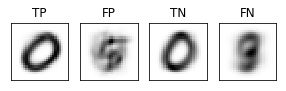

p =  20


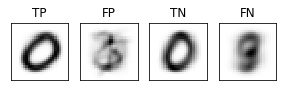

p =  30


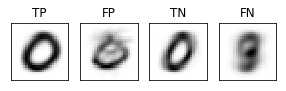

p =  40


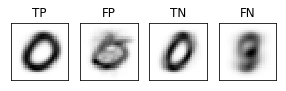

p =  50


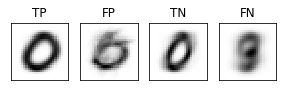

p =  60


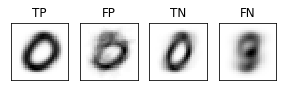

p =  70


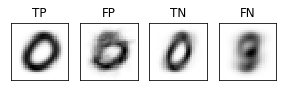

p =  80


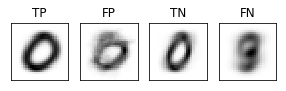

p =  90


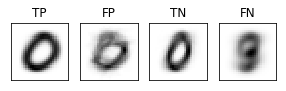

p =  100


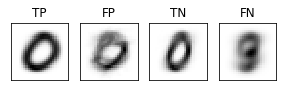

In [21]:
f3 = plt.figure()

for k in range(10):
    
    print("p = ",10*(k+1))

    im_average  = np.zeros((size_row * size_col, 4), dtype=float)
    im_count    = np.zeros(4, dtype=int)

    for i in range(num_test):

        im_average[:, eval_vecs[k][i]] += list_image_test[:, i]
        im_count[eval_vecs[k][i]] += 1

    for i in range(4):

        im_average[:, i] /= im_count[i]

        plt.subplot(2, 5, i+1)

        if i==0:
            plt.title('TP')
        if i==1:
            plt.title('FP')
        if i==2:
            plt.title('TN')
        if i==3:
            plt.title('FN')

        plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()